# **Automate Identification And Recognition Of Handwritten Text from An Image.**
 (Using Convolutional Recurrent Neural Network)



---



---


**Name Of The Student		:**	MOHAMMED SHIBIN ROSHAN K T

**Internship Project Topic		:** Automate identification and recognition of handwritten text from an image

**Name of the Organization	:** TCS iON -125

**Name of the Industry Mentor	:** DEBASHIS ROY

**Name of the Institute		:** ICT ACADEMY


---



---




## **Introduction**
An optical character recognition problem is basically a type of image-based sequence recognition problem. And for sequence recognition problem, most suited neural networks are recurrent neural networks(RNN) while for an image-based problem most suited are convolution neural networks(CNN). To cop up with the OCR problems we need to combine both of these CNN and RNN.

We can break the implementation of CRNN network into following steps:

1.   Setting Up kaggle.
2.   Collecting Dataset
3.   Preprocessing Data
4.   Creating Network Architecture
5.   Defining Loss Function
6.   Training Model
7.   Testing and Prediction
8.   Plot Accuracy and Loss.
9.   Get Best Model Index
10.   Save the Model.

## **Setting Up Kaggle in Google Colab.**
This is optional method to run this model. This method is only for use of GPU on Google Colab. If one wants to use GPU on local machine then this step is not required. I used kaggle to load dataset in Google Colab. There are 4 steps to setting up kaggle in google colab.

1.   Install Kaggle.
2.   Create token.
3.   Create Folder.
4.   Get API link and download dataset.
5.   Unzip the File.

## **Dataset**
we used IAM handwritten datset. This is good dataset total of 1.09 GB images. Here I have used only 7850 images for the training set and 876 images for validation dataset.

To download the dataset either you can directly download from [this link](https://fki.tic.heia-fr.ch/databases/iam-handwriting-database) or use the following commands to download the data and unzip.




**Installing Kaggle to use kaggle dataset on Google Colab.**

In [1]:
!pip install kaggle

**I uploaded IAM datset of words on kaggle.**

For more details of how to upload datset on kaggle [click here](https://www.kaggle.com/datasets/sukhandeepshergill/iamdatasethtrwords).

**First grab your token from kaggle.**

For more details of creating API on kaggle [click here](https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463).

Upload the json file got from kaggle.

In [2]:
from google.colab import files
files.upload() #upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shibinroshan01","key":"2f87d872921511a5481cc91be3600430"}'}

**Creat a folder to store kaggle dataset on colab.**

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

**Copy the API link and paste with '!' to download the datset.**

In [4]:
!kaggle datasets download -d sukhandeepshergill/iamdatasethtrwords

100% 781M/782M [00:08<00:00, 73.8MB/s]
100% 782M/782M [00:08<00:00, 95.0MB/s]


**This code for unzip the file.**

In [5]:
from zipfile import ZipFile
file_name = "iamdatasethtrwords.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
!tar -xvf '/content/words.tgz' -C '/content/words'
#we need to create a new folder/directory named words inside our file path. This will export the images in to that directory.

Streaming output truncated to the last 5000 lines.
r06/r06-137/r06-137-05-08.png
r06/r06-137/r06-137-05-09.png
r06/r06-137/r06-137-05-10.png
r06/r06-137/r06-137-05-11.png
r06/r06-137/r06-137-06-00.png
r06/r06-137/r06-137-06-01.png
r06/r06-137/r06-137-06-02.png
r06/r06-137/r06-137-06-03.png
r06/r06-137/r06-137-06-04.png
r06/r06-137/r06-137-06-05.png
r06/r06-137/r06-137-06-06.png
r06/r06-137/r06-137-06-07.png
r06/r06-137/r06-137-06-08.png
r06/r06-137/r06-137-07-00.png
r06/r06-137/r06-137-07-01.png
r06/r06-137/r06-137-07-02.png
r06/r06-137/r06-137-07-03.png
r06/r06-137/r06-137-07-04.png
r06/r06-137/r06-137-07-05.png
r06/r06-137/r06-137-07-06.png
r06/r06-137/r06-137-07-07.png
r06/r06-137/r06-137-07-08.png
r06/r06-137/r06-137-07-09.png
r06/r06-137/r06-137-07-10.png
r06/r06-137/r06-137-07-11.png
r06/r06-137/r06-137-07-12.png
r06/r06-137/r06-137-08-00.png
r06/r06-137/r06-137-08-01.png
r06/r06-137/r06-137-08-02.png
r06/r06-137/r06-137-08-03.png
r06/r06-137/r06-137-08-04.png
r06/r06-137/r06-137

## **Importing necessary packages.**

**Installing Keras_tqdm.**

In [7]:
!pip install keras_tqdm

In [8]:
import numpy as np
import cv2
import os
import pandas as pd
import string
import matplotlib.pyplot as plt

import os
from google.colab import drive #To use googel drive to get files.

from keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional
from keras.models import Model
from keras.activations import relu, sigmoid, softmax
import keras.backend as K
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
import tensorflow as tf

#ignore warnings in the output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## **Tensorflow GPU**

We used Google Colab GPU.

In [10]:
from tensorflow.python.client import device_lib

# Check all available devices if GPU is available
print(device_lib.list_local_devices())
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13145303768784922134
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14357954560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6936464950423791322
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



**This step is to check GPU is available or not.**

In [11]:
tf.config.experimental.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
tf.test.gpu_device_name()

'/device:GPU:0'

## **Preprocessing**
Now we are having our dataset, to make it acceptable for our model we need to use some preprocessing. We need to preprocess both the input image and output labels.
To preprocess our input image we will use followings:
Read the image and convert into a gray-scale image
Make each image of size (128,32) by using padding
Expand image dimension as (128,32,1) to make it compatible with the input shape of architecture
Normalize the image pixel values by dividing it with 255.

To preprocess the output labels use the followings:
Read the text from the words.txt file because it contains text written inside the image. Which is in the format 'a01-000u-00-00 ok 154 408 768 27 51 AT A'.

Compute the maximum length from words and pad every output label to make it of the same size as the maximum length. This is done to make it compatible with the output shape of our RNN architecture. Then convert to numpy array.

1.   Dataset = [IAM dataset.](https://fki.tic.heia-fr.ch/databases/iam-handwriting-database)
2.   Dataset used in this project = [words.tgz](https://www.kaggle.com/datasets/sukhandeepshergill/iamdatasethtrwords)





**Loading words.txt file in this function.**

In [13]:
drive.mount('/content/drive')
with open('/content/drive/MyDrive/words.txt') as f:
    contents = f.readlines()

lines = [line.strip() for line in contents]
lines[0]

Mounted at /content/drive


'a01-000u-00-00 ok 154 408 768 27 51 AT A'

In [14]:
max_label_len = 0

char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

# string.ascii_letters + string.digits (Chars & Digits)
# or
# "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

print(char_list, len(char_list))

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))

    return dig_lst

!"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz 78


In [15]:
images = []
labels = []

RECORDS_COUNT = 10000

In [16]:
train_images = []
train_labels = []
train_input_length = []
train_label_length = []
train_original_text = []

valid_images = []
valid_labels = []
valid_input_length = []
valid_label_length = []
valid_original_text = []

inputs_length = []
labels_length = []

In [17]:
def process_image(img):
    """
    Converts image to shape (32, 128, 1) & normalize
    """
    w, h = img.shape

#     _, img = cv2.threshold(img,
#                            128,
#                            255,
#                            cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Aspect Ratio Calculation
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape

    img = img.astype('float32')

    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape

    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape

    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)

    img = cv2.subtract(255, img)

    img = np.expand_dims(img, axis=2)

    # Normalize
    img = img / 255

    return img

**Generate Train and Validation set.**

*Here we are
using kaggle dataset.
Which is unziped file of words.tgz*

In [18]:
for index, line in enumerate(lines):
    splits = line.split(' ')
    status = splits[1]

    if status == 'ok':
        word_id = splits[0]
        word = "".join(splits[8:])

        splits_id = word_id.split('-')
        filepath = 'words/{}/{}-{}/{}.png'.format(splits_id[0],
                                                  splits_id[0],
                                                  splits_id[1],
                                                  word_id)

        # processing on image
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        try:
            img = process_image(img)
        except:
            continue

        # processing on label
        try:
            label = encode_to_labels(word)
        except:
            continue

        if index % 10 == 0:
            valid_images.append(img)
            valid_labels.append(label)
            valid_input_length.append(31)
            valid_label_length.append(len(word))
            valid_original_text.append(word)
        else:
            train_images.append(img)
            train_labels.append(label)
            train_input_length.append(31)
            train_label_length.append(len(word))
            train_original_text.append(word)

        if len(word) > max_label_len:
            max_label_len = len(word)

    if index >= RECORDS_COUNT:
        break

**Generate Padded label**
(padded_label = pad_sequences(labels,
                              maxlen=max_label_len,
                              padding='post',
                              value=len(char_list)))

In [19]:
train_padded_label = pad_sequences(train_labels,
                             maxlen=max_label_len,
                             padding='post',
                             value=len(char_list))

valid_padded_label = pad_sequences(valid_labels,
                             maxlen=max_label_len,
                             padding='post',
                             value=len(char_list))

In [20]:
train_padded_label.shape, valid_padded_label.shape

((7850, 16), (876, 16))

**Convert to numpy array.**
*   images = np.asarray(images)
*   inputs_length = np.asarray(inputs_length)
*   labels_length = np.asarray(labels_length)

In [21]:

train_images = np.asarray(train_images)
train_input_length = np.asarray(train_input_length)
train_label_length = np.asarray(train_label_length)

valid_images = np.asarray(valid_images)
valid_input_length = np.asarray(valid_input_length)
valid_label_length = np.asarray(valid_label_length)

In [22]:
train_images.shape

(7850, 32, 128, 1)

## **Build Model (Network Archtecture).**
(Using Convolutional Recurrent Neural Network)

This network architecture is inspired by [this paper](https://arxiv.org/pdf/1507.05717.pdf). Let’s see the steps that we used to create the architecture:

Input shape for our architecture having an input image of height 32 and width 128.
Here we used seven convolution layers of which 6 are having kernel size (3,3) and the last one is of size (2.2). And the number of filters is increased from 64 to 512 layer by layer.
Two max-pooling layers are added with size (2,2) and then two max-pooling layers of size (2,1) are added to extract features with a larger width to predict long texts.
Also, we used batch normalization layers after fifth and sixth convolution layers which accelerates the training process.
Then we used a lambda function to squeeze the output from conv layer and make it compatible with LSTM layer.
Then used two Bidirectional LSTM layers each of which has 128 units. This RNN layer gives the output of size (batch_size, 31, 63). Where 63 is the total number of output classes including blank character.

In [23]:
# input with shape of height=32 and width=128
inputs = Input(shape=(32,128,1))

# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
# poolig layer with kernel size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)

conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)

conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)

conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)

# poolig layer with kernel size (2,1)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)

conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)

# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)

conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)

conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)

squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)

# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(blstm_1)

outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

In [24]:
act_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 128, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 32, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 32, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 32, 256)        295168

## **Loss Function**
Here, we are using the CTC loss function. CTC loss is very helpful in text recognition problems. It helps us to prevent annotating each time step and help us to get rid of the problem where a single character can span multiple time step which needs further processing if we do not use CTC.

A CTC loss function requires four arguments to compute the loss, predicted outputs, ground truth labels, input sequence length to LSTM and ground truth label length. To get this we need to create a custom loss function and then pass it to the model. To make it compatible with our model, we will create a model which takes these four inputs and outputs the loss. This model will be used for training and for testing we will use the model that we have created earlier “act_model”. Let’s see the code:

In [25]:
the_labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args

    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, the_labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, the_labels, input_length, label_length], outputs=loss_out)

## **Train the Model**
To train the model we will use Adam optimizer. Also, we can use Keras callbacks functionality to save the weights of the best model on the basis of validation loss. In model.compile(), you can see that I have only taken y_pred and neglected y_true. This is because I have already taken labels as input to the model earlier. labels as input to the model earlier.

Now train your model on 7850 training images and 876 validation images.

In [26]:
batch_size = 8
epochs = 30
e = str(epochs)
optimizer_name = 'sgd'

In [27]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = optimizer_name, metrics=['accuracy'])

filepath="/content/{}o-{}r-{}e-{}t-{}v.hdf5".format(optimizer_name,
                                          str(RECORDS_COUNT),
                                          str(epochs),
                                          str(train_images.shape[0]),
                                          str(valid_images.shape[0]))

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [28]:
history = model.fit(x=[train_images, train_padded_label, train_input_length, train_label_length],
                    y=np.zeros(len(train_images)),
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=([valid_images, valid_padded_label, valid_input_length, valid_label_length], [np.zeros(len(valid_images))]),
                    verbose=2,
                    callbacks=callbacks_list)

Epoch 1/30

Epoch 1: val_loss improved from inf to 18.40261, saving model to /content/sgdo-10000r-30e-7850t-876v.hdf5
982/982 - 50s - loss: 15.2535 - accuracy: 0.0000e+00 - val_loss: 18.4026 - val_accuracy: 0.0000e+00 - 50s/epoch - 51ms/step
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 18.40261 to 12.17374, saving model to /content/sgdo-10000r-30e-7850t-876v.hdf5
982/982 - 26s - loss: 12.5371 - accuracy: 0.0261 - val_loss: 12.1737 - val_accuracy: 0.0514 - 26s/epoch - 27ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 12.17374
982/982 - 25s - loss: 10.5316 - accuracy: 0.0646 - val_loss: 12.8928 - val_accuracy: 0.0502 - 25s/epoch - 26ms/step
Epoch 4/30

Epoch 4: val_loss improved from 12.17374 to 11.40305, saving model to /content/sgdo-10000r-30e-7850t-876v.hdf5
982/982 - 25s - loss: 8.4345 - accuracy: 0.1172 - val_loss: 11.4030 - val_accuracy: 0.0970 - 25s/epoch - 25ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 11.40305
982/982 - 25s - loss: 6.3410 - accuracy: 0.1679 - val_loss: 12.2932 - val_accuracy: 0.0365 - 25s/epoch - 26ms/step
Epoch 6/30

Epoch 6: val_loss improved from 11.40305 to 8.18768, saving model to /content/sgdo-10000r-30e-7850t-876v.hdf5
982/982 - 25s - loss: 4.8772 - accuracy: 0.2279 - val_loss: 8

## **Test the Model**
Our model is now trained with 7850 images. Now its time to test the model. We can not use our training model because it also requires labels as input and at test time we can not have labels. So to test the model we will use ” act_model ” that we have created earlier which takes only one input: test images.

As our model predicts the probability for each class at each time step, we need to use some transcription function to convert it into actual texts. Here we used the CTC decoder to get the output text. Let’s see the code:

We use Jaro Distance & Ratio method to test accuracy.

**Installing Levenshtein package in google colab.**

In [29]:
!pip install python-levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.4 MB/s eta 0:00:00


In [30]:
# load the saved best model weights
act_model.load_weights(filepath)

# predict outputs on validation images
prediction = act_model.predict(valid_images)

# use CTC decoder
decoded = K.ctc_decode(prediction,
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]
out = K.get_value(decoded)

import Levenshtein as lv

total_jaro = 0
total_rati = 0
# see the results
for i, x in enumerate(out):
    letters=''
    for p in x:
        if int(p) != -1:
            letters+=char_list[int(p)]
    total_jaro+=lv.jaro(letters, valid_original_text[i])
    total_rati+=lv.ratio(letters, valid_original_text[i])

print('jaro :', total_jaro/len(out))
print('ratio:', total_rati/len(out))

28/28 [==============================] - 4s 25ms/step
jaro : 0.9045920361559632
ratio: 0.8735278079541002


**Prediction.**

4/4 [==============================] - 0s 111ms/step
original_text =   the
predicted text = the

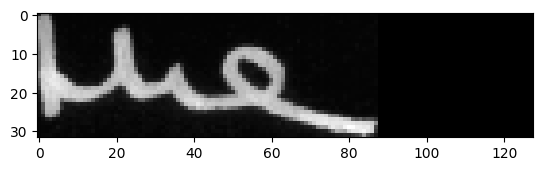



original_text =   Colonial
predicted text = Colonial

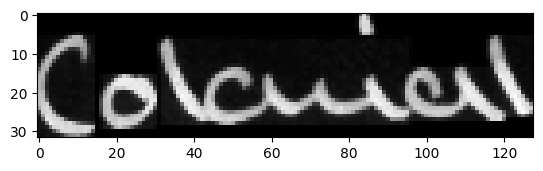



original_text =   Secretary
predicted text = Secretary

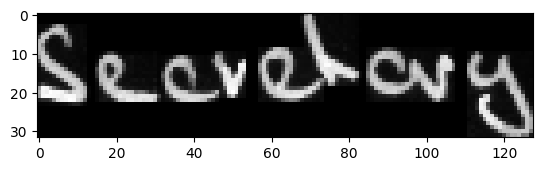



original_text =   ,
predicted text = ,

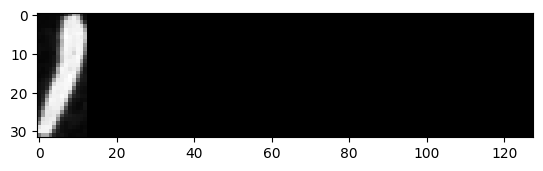



original_text =   Mr.
predicted text = Mr.

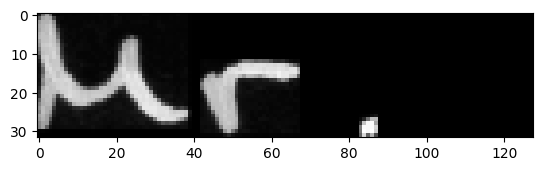



original_text =   Iain
predicted text = lain

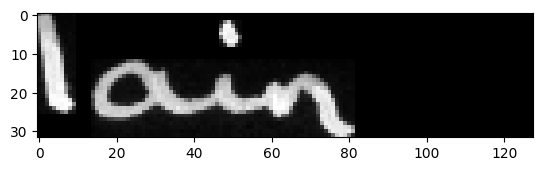



original_text =   Macleod
predicted text = Macleod

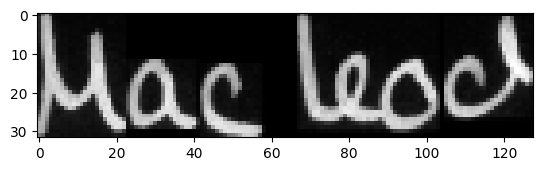



original_text =   is
predicted text = is

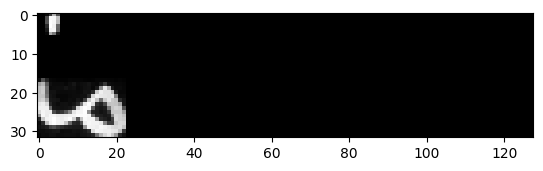



original_text =   insisting
predicted text = insisting

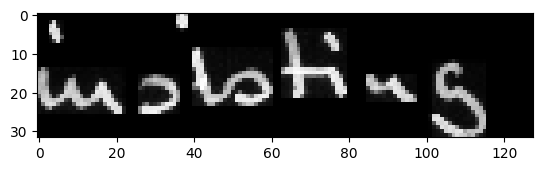



original_text =   on
predicted text = on

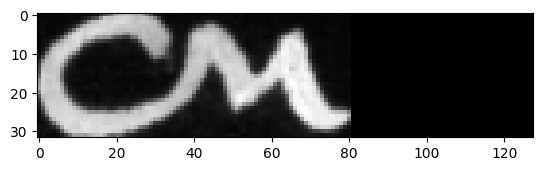



original_text =   a
predicted text = a

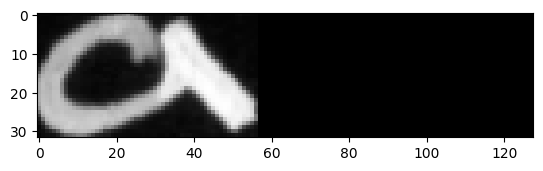



original_text =   policy
predicted text = policy

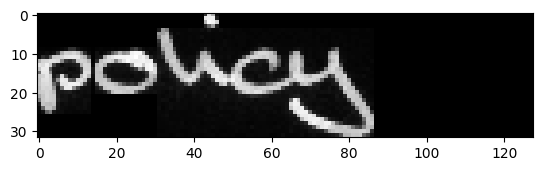



original_text =   of
predicted text = of

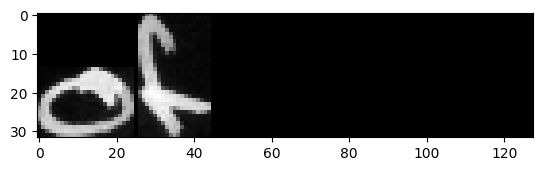



original_text =   change
predicted text = change

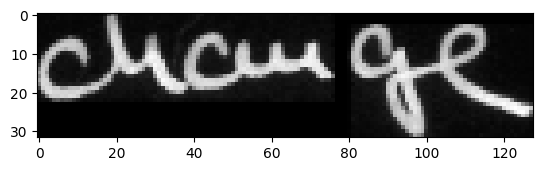



original_text =   .
predicted text = .

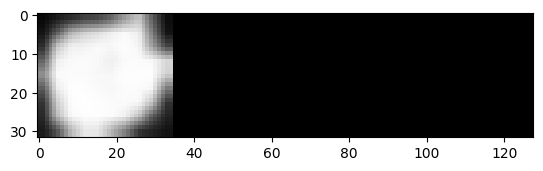



original_text =   Macleod
predicted text = Macleod

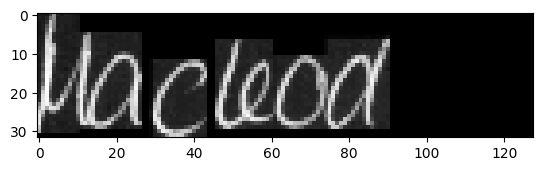



original_text =   ,
predicted text = ,

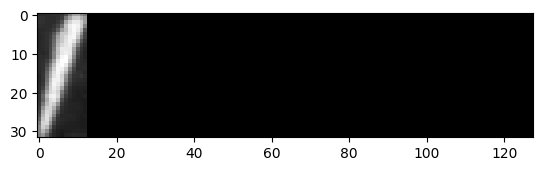



original_text =   is
predicted text = is

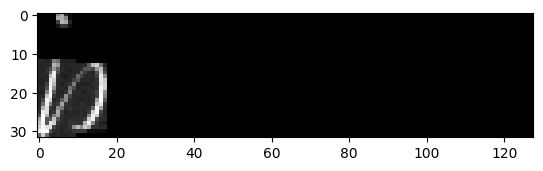



original_text =   on
predicted text = on

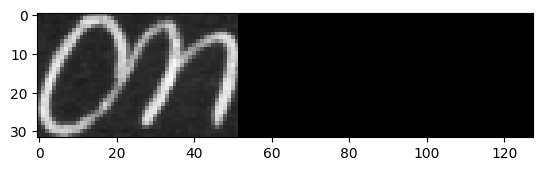



original_text =   a
predicted text = a

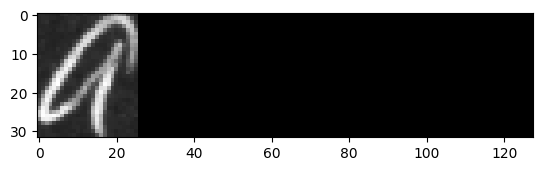



original_text =   policy
predicted text = potisy

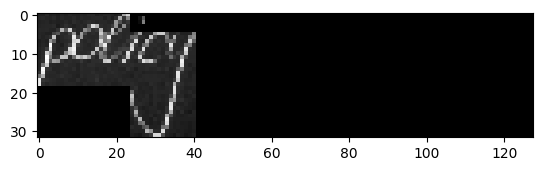



original_text =   of
predicted text = of

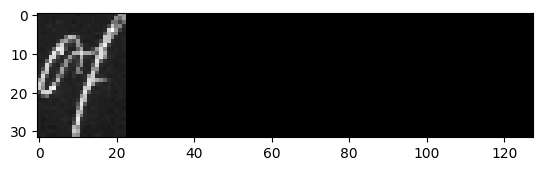



original_text =   change
predicted text = cdange

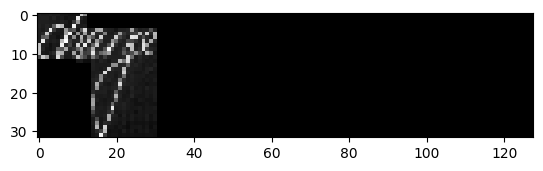



original_text =   .
predicted text = .

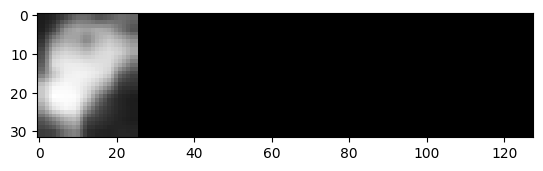



original_text =   Sir
predicted text = Sir

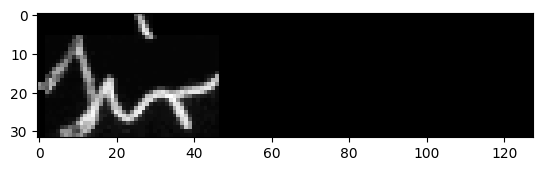



original_text =   Roy's
predicted text = Roy's

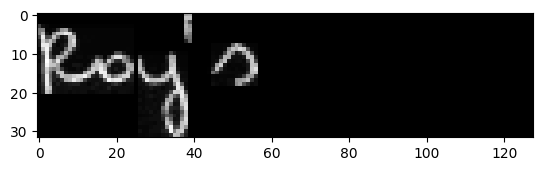



original_text =   United
predicted text = United

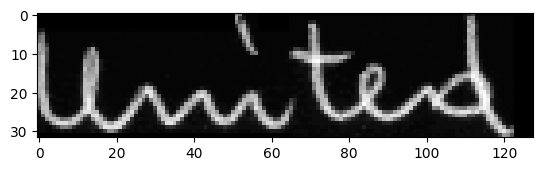



original_text =   Party
predicted text = Porty

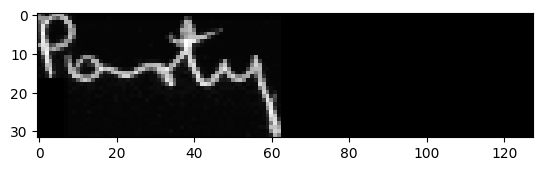



original_text =   is
predicted text = is

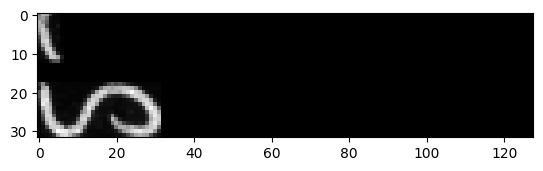



original_text =   boycotting
predicted text = boycotting

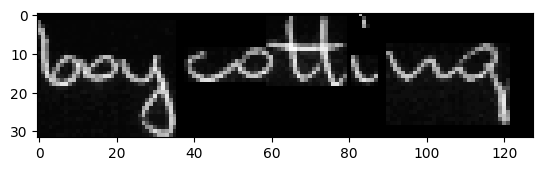



original_text =   the
predicted text = the

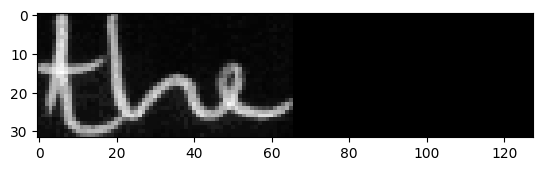



original_text =   London
predicted text = London

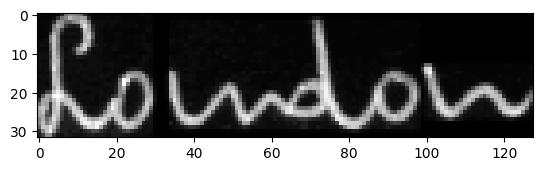



original_text =   talks
predicted text = talls

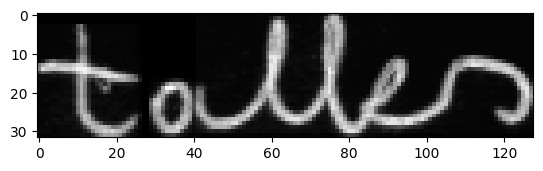



original_text =   on
predicted text = on

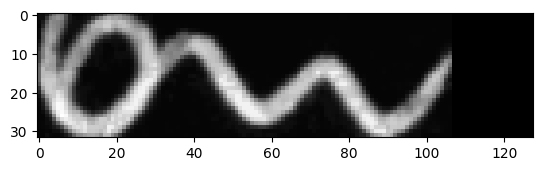



original_text =   the
predicted text = the

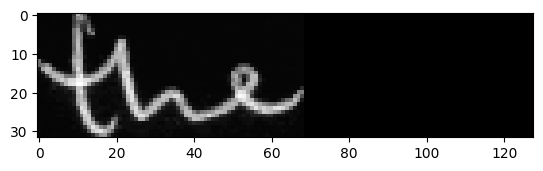



original_text =   Protectorate's
predicted text = Protectorate's

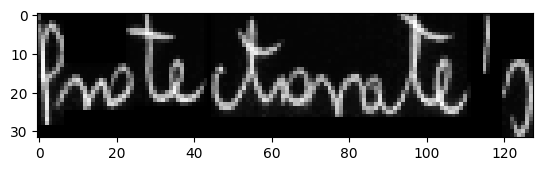



original_text =   .
predicted text = .

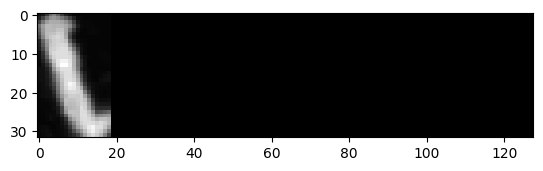



original_text =   Said
predicted text = Said

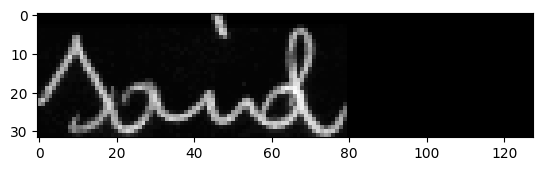



original_text =   Mr.
predicted text = Mr.

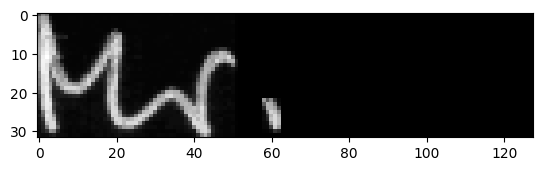



original_text =   Nkumbula
predicted text = Nkumbula

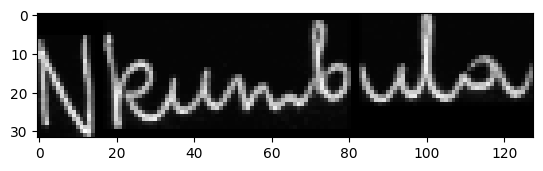



original_text =   last
predicted text = last

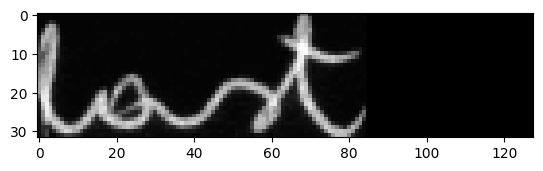



original_text =   night
predicted text = night

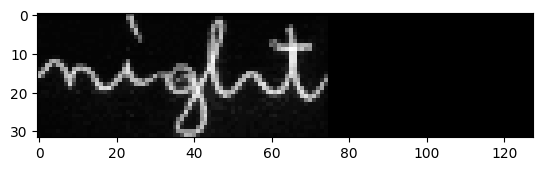



original_text =   :
predicted text = :

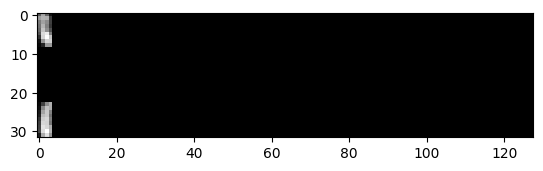



original_text =   "
predicted text = "

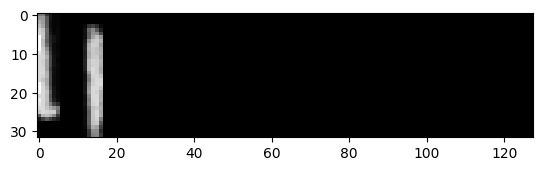



original_text =   We
predicted text = We

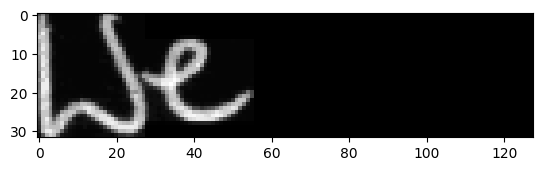



original_text =   to
predicted text = to

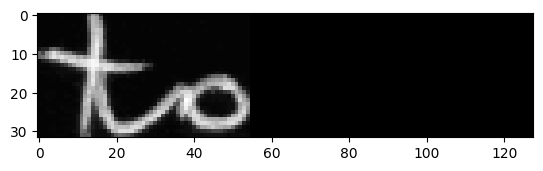



original_text =   discuss
predicted text = discuss

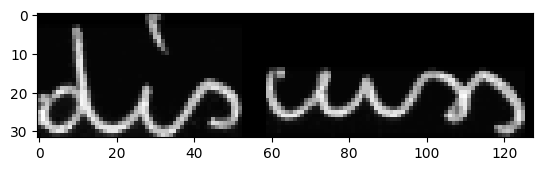



original_text =   what
predicted text = what

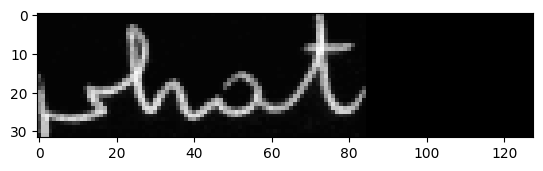



original_text =   to
predicted text = to

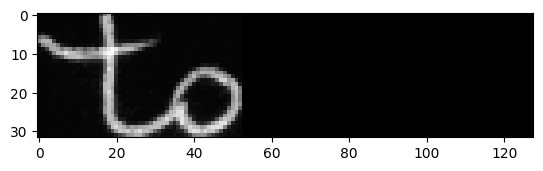



original_text =   do
predicted text = do

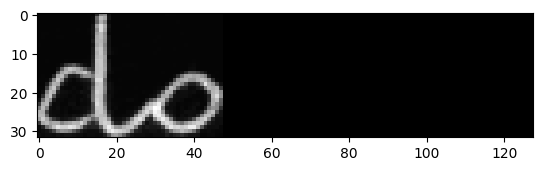



original_text =   if
predicted text = if

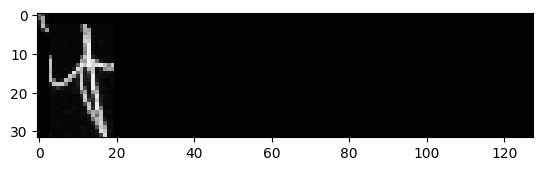



original_text =   the
predicted text = the

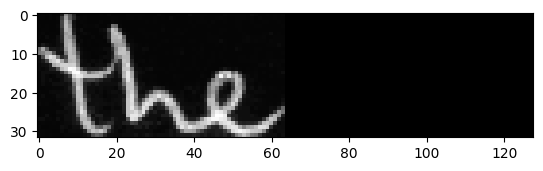



original_text =   British
predicted text = British

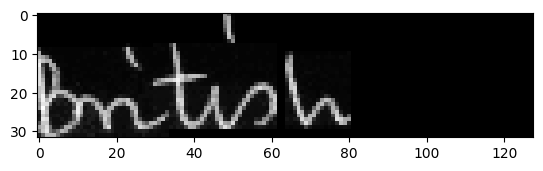



original_text =   Government
predicted text = Government

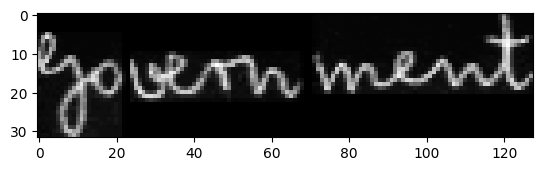



original_text =   in
predicted text = in

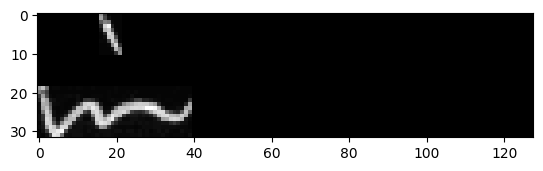



original_text =   to
predicted text = to

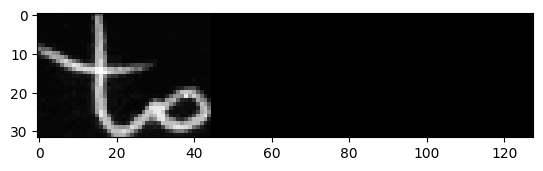



original_text =   Sir
predicted text = Sir

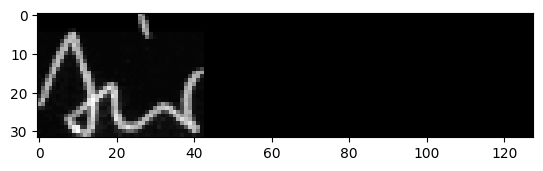



original_text =   Roy
predicted text = Roy

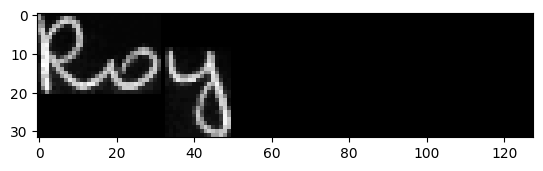



original_text =   and
predicted text = and

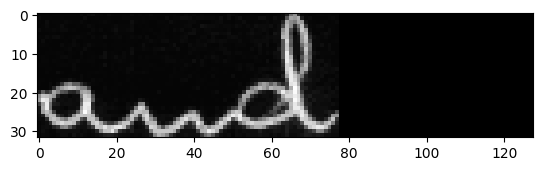



original_text =   the
predicted text = the

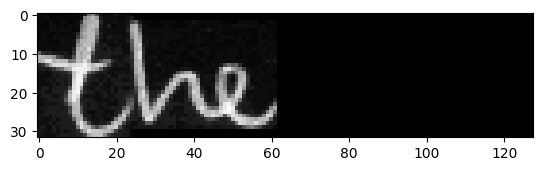



original_text =   talks
predicted text = talks

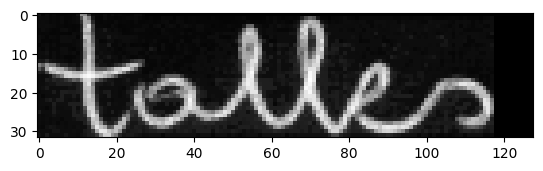



original_text =   fall
predicted text = fall

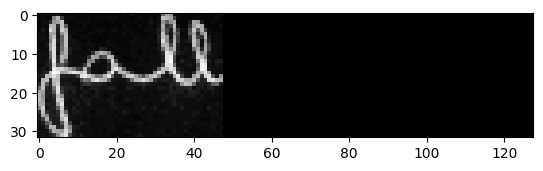



original_text =   through
predicted text = trough

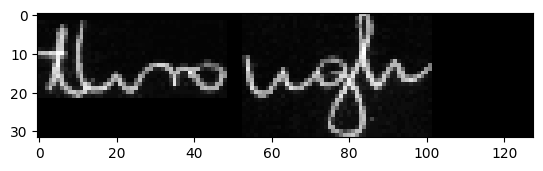



original_text =   There
predicted text = There

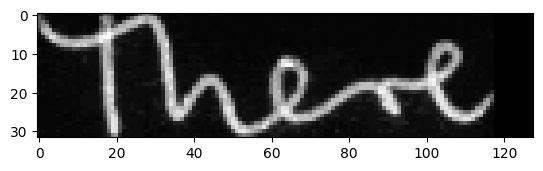



original_text =   are
predicted text = are

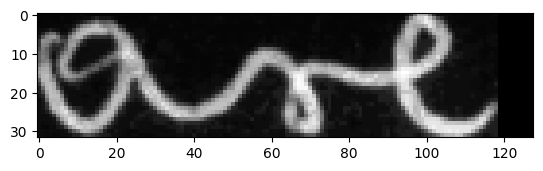



original_text =   bound
predicted text = bound

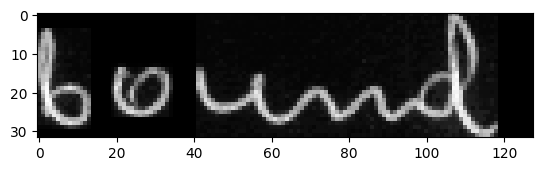



original_text =   chief
predicted text = hicf

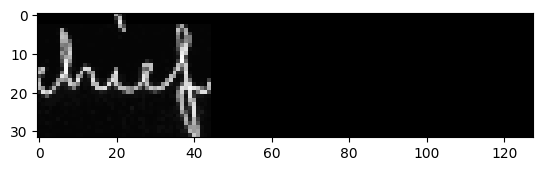



original_text =   aide
predicted text = nide

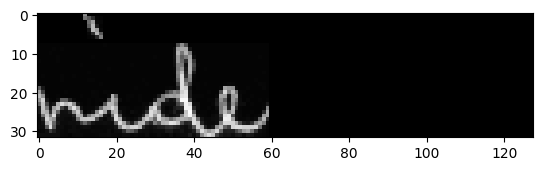



original_text =   ,
predicted text = ,

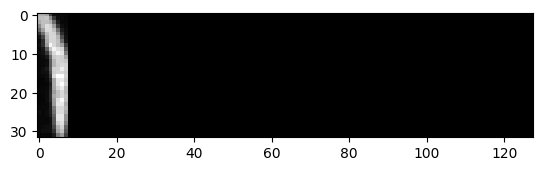



original_text =   Mr.
predicted text = Mr.

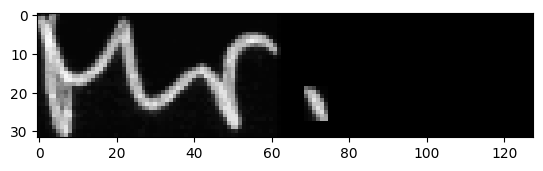



original_text =   Julius
predicted text = Julius

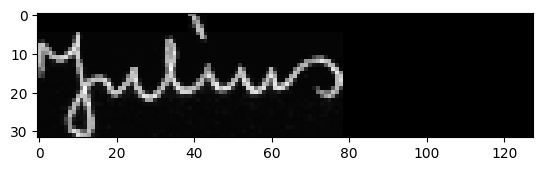



original_text =   Greenfield
predicted text = Greenfield

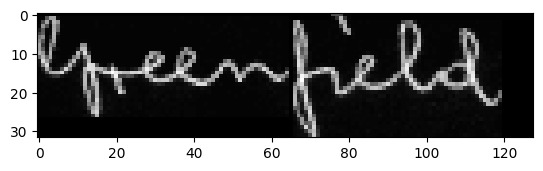



original_text =   ,
predicted text = ,

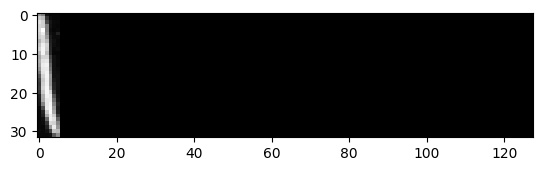



original_text =   telephoned
predicted text = telephoned

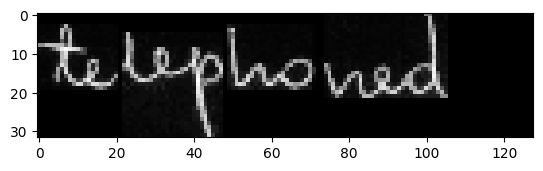



original_text =   chief
predicted text = chief

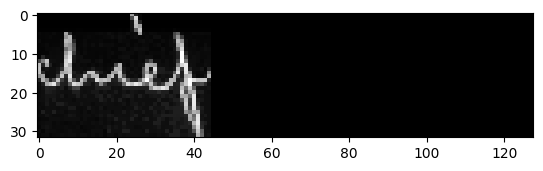



original_text =   a
predicted text = a

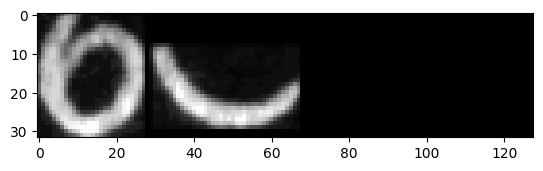



original_text =   report
predicted text = report

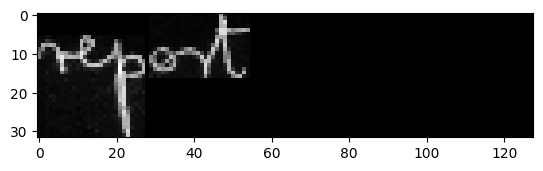



original_text =   on
predicted text = on

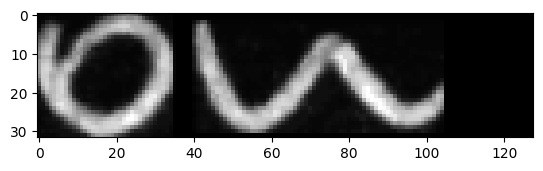



original_text =   his
predicted text = his

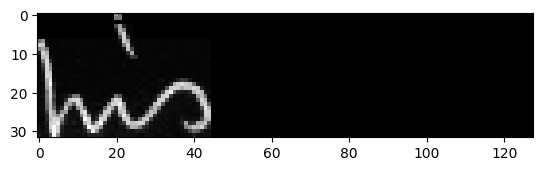



original_text =   talks
predicted text = talks

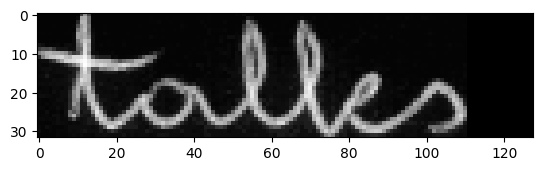



original_text =   with
predicted text = wsith

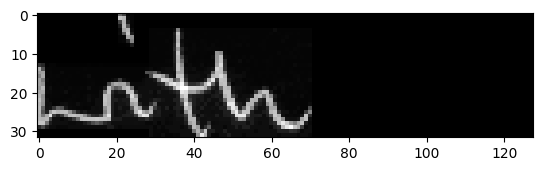



original_text =   Mr.
predicted text = Mr.

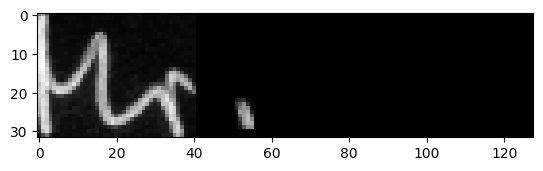



original_text =   Macmillan
predicted text = Mracmillan

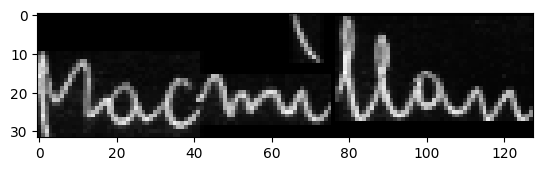



original_text =   Chequers
predicted text = Chequers

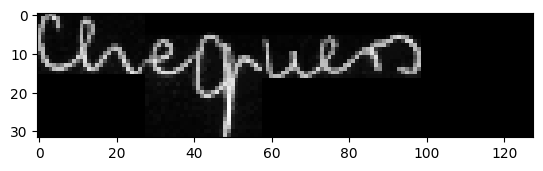



original_text =   .
predicted text = .

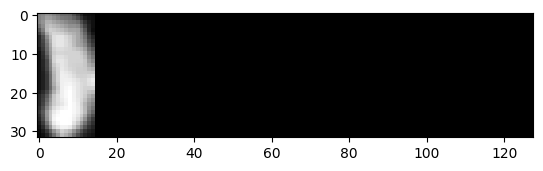



original_text =   Sir
predicted text = Sir

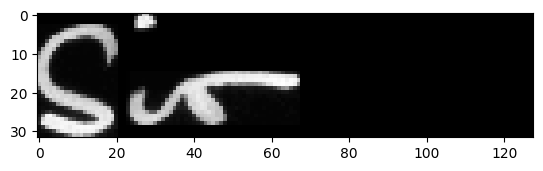



original_text =   Roy's
predicted text = Roy's

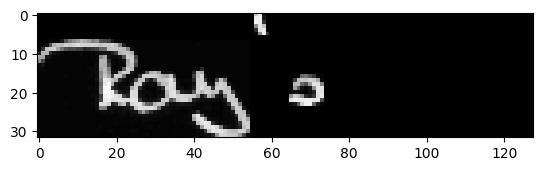



original_text =   United
predicted text = United

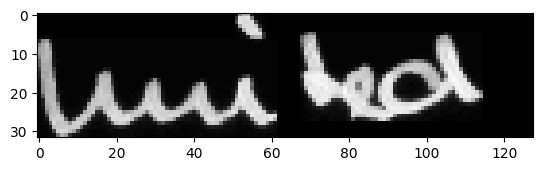



original_text =   Federal
predicted text = Federal

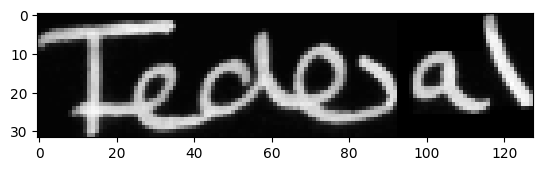



original_text =   Party
predicted text = Party

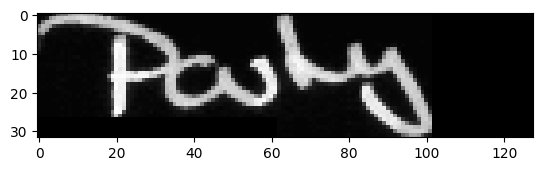



original_text =   is
predicted text = is

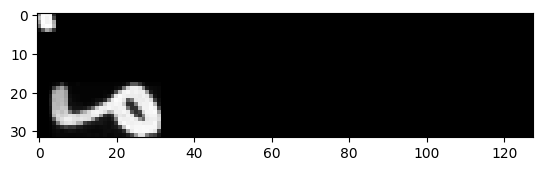



original_text =   boycotting
predicted text = boycatting

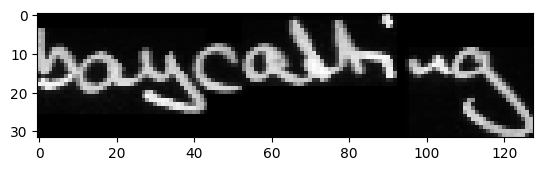



original_text =   London
predicted text = London

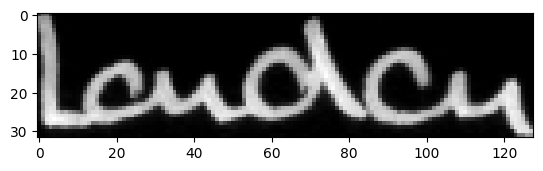



original_text =   talks
predicted text = talks

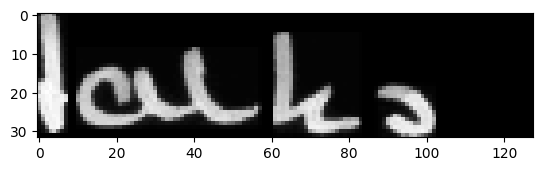



original_text =   on
predicted text = on

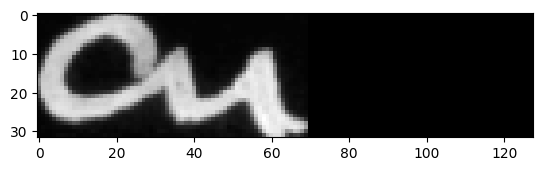



original_text =   the
predicted text = the

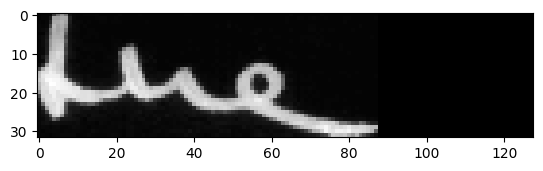



original_text =   last
predicted text = last

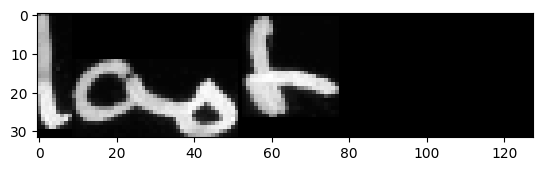



original_text =   night
predicted text = night

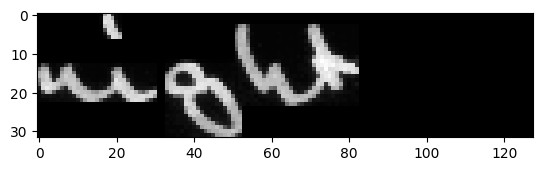



original_text =   :
predicted text = :

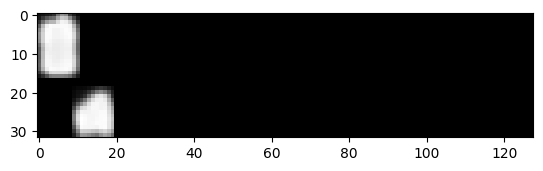



original_text =   "
predicted text = "

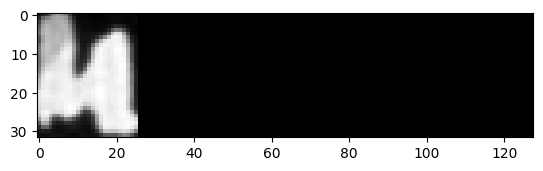



original_text =   We
predicted text = We

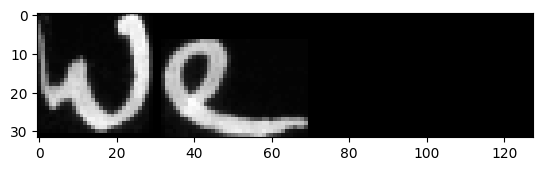



original_text =   want
predicted text = wont

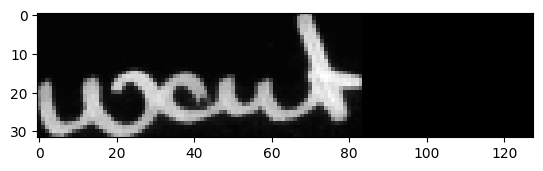



original_text =   to
predicted text = to

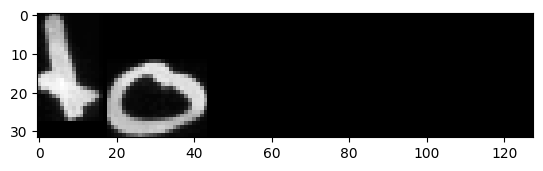

In [31]:
# predict outputs on validation images
prediction =act_model.predict(train_images[542:645])

# use CTC decoder
decoded = K.ctc_decode(prediction,
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]

out = K.get_value(decoded)

# see the results
for i, x in enumerate(out):
    print("original_text =  ", train_original_text[542+i])
    print("predicted text = ", end = '')
    for p in x:
        if int(p) != -1:
            print(char_list[int(p)], end = '')
    plt.imshow(train_images[542+i].reshape(32,128), cmap=plt.cm.gray)
    plt.show()
    print('\n')

## **Plot Accuracy and Loss**

In [32]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [33]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

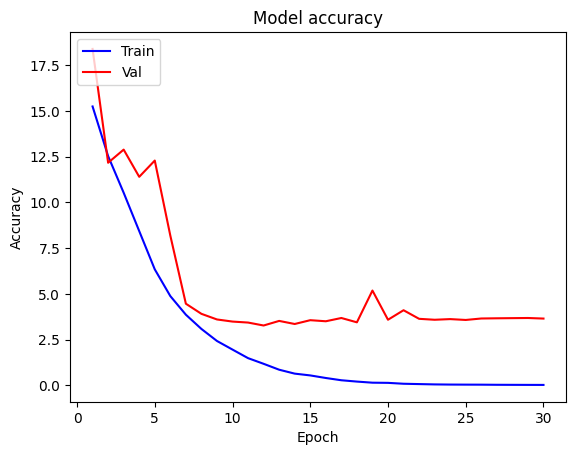

In [34]:
plotgraph(epochs, loss, val_loss)

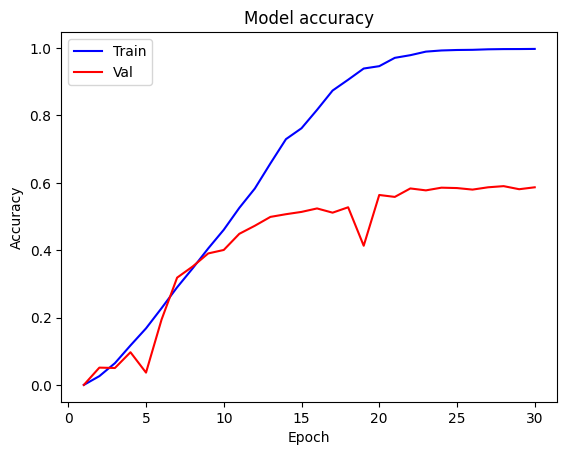

In [35]:
plotgraph(epochs, acc, val_acc)

## **Get Best Model Index**

In [36]:
minimum_val_loss = np.min(history.history['val_loss'])
best_model_index = np.where(history.history['val_loss'] == minimum_val_loss)[0][0]

best_loss = str(history.history['loss'][best_model_index])
best_acc = str(history.history['accuracy'][best_model_index])
best_val_loss = str(history.history['val_loss'][best_model_index])
best_val_acc = str(history.history['val_accuracy'][best_model_index])

In [37]:
with open('/content/history.txt', 'a') as f:
    new_data = '{},{},{},{},{},{},{},{},{},{}\n'.format(filepath,
                                                      optimizer_name,
                                                      str(RECORDS_COUNT),
                                                      e,
                                                      str(train_images.shape[0]),
                                                      str(valid_images.shape[0]),
                                                      best_loss,
                                                      best_acc,
                                                      best_val_loss,
                                                      best_val_acc)
    f.write(new_data)

## **Save the Model.**

In [38]:
model.save('Text_recognizer_Using_CRNN.h5')